In [249]:
#Importing required Python packages
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np
from scipy import sparse
from sklearn.datasets import make_classification, make_blobs, load_boston, fetch_california_housing
from sklearn import metrics
from sklearn.learning_curve import learning_curve
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.grid_search import GridSearchCV
from pprint import pprint
import pandas as pd
from pandas.tools.plotting import scatter_matrix
import urllib
import requests
import seaborn as sns
import pickle

plt.style.use('ggplot')

In [86]:
from get_train_test_for_modeling import *
filename = '../data/data_X_y_46059_train_w_tide.csv'
Xy_df = get_Xy_data(filename)

cols_to_keep = ['YY_x', 'MM_x', 'DD_x', 'hh_x', 'WD_x', 'WSPD_x',
                'GST_x', 'WVHT_x', 'DPD_x', 'APD_x', 'BAR_x', 'ATMP_x',
                'WTMP_x', 'DEWP_x', 'ID_x', 't_arrive','WVHT_y']

allyrs = [1995, 1996, 1997, 1998, 1999, 2000, 2003, 2004, 2006, 2007, 2008]

def make_cv_data_sets(dataframe, cols_to_keep, allyrs):
    X_train_sets = []
    y_train_sets = []
    X_test_sets  = []
    y_test_sets  = []
    for year in allyrs:
        test_yr = [year]
        train_yr =[yr for yr in allyrs if yr != cvyear]
        X_train, X_test, y_train, y_test = get_train_test(Xy_df, cols_to_keep, train_yr, test_yr)
        X_train_sets.append(X_train)
        y_train_sets.append(y_train)
        X_test_sets.append(X_test)
        y_test_sets.append(y_test)
    return X_train_sets, y_train_sets, X_test_sets, y_test_sets

In [96]:
X_train_sets, y_train_sets, X_test_sets, y_test_sets = make_cv_data_sets(Xy_df, cols_to_keep, allyrs)

In [111]:
# Effect of changing tree depth
N = 500
N_ESTIMATORS = 1000
tree_depths = [1, 3, 5, 7, 10]
error_lst = []
for i in range(len(X_train_sets)):
    models = [GradientBoostingRegressor(learning_rate=0.01, 
                                        n_estimators=N_ESTIMATORS, 
                                        max_depth=td) 
                for td in tree_depths]
    
    for j,model in enumerate(models):
        print('fitting and predicting for fold {} and tree depth {}'.format(i, tree_depths[j]))
        model.fit(X_train_sets[i], y_train_sets[i])
        y_hat = model.predict(X_test_sets[i])
        mse = metrics.mean_squared_error(y_test_sets[i], y_hat)
        error_lst.append(mse) 
   

fitting and predicting for fold 0 and tree depth 1


/Users/abdulla/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


fitting and predicting for fold 0 and tree depth 3
fitting and predicting for fold 0 and tree depth 5
fitting and predicting for fold 0 and tree depth 7
fitting and predicting for fold 0 and tree depth 10
fitting and predicting for fold 1 and tree depth 1
fitting and predicting for fold 1 and tree depth 3
fitting and predicting for fold 1 and tree depth 5
fitting and predicting for fold 1 and tree depth 7
fitting and predicting for fold 1 and tree depth 10
fitting and predicting for fold 2 and tree depth 1
fitting and predicting for fold 2 and tree depth 3
fitting and predicting for fold 2 and tree depth 5
fitting and predicting for fold 2 and tree depth 7
fitting and predicting for fold 2 and tree depth 10
fitting and predicting for fold 3 and tree depth 1
fitting and predicting for fold 3 and tree depth 3
fitting and predicting for fold 3 and tree depth 5
fitting and predicting for fold 3 and tree depth 7
fitting and predicting for fold 3 and tree depth 10
fitting and predicting for 

In [179]:
folds = [i for i in range(10)]
dict_cv ={}
for i, item in enumerate(zip([i for i in range(0,55,5)], [j for j in range(5,55,5)])):
    dict_cv[i] = error_lst[item[0]:item[1]]

In [205]:
df_cv = pd.DataFrame(dict_cv).T
col_names = ['Depth_1', 'Depth_3', 'Depth_5', 'Depth_7', 'Depth_10']
df_cv.columns = col_names

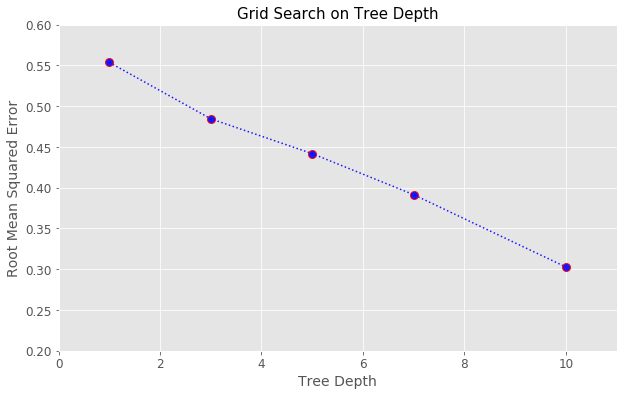

In [248]:
fig, ax = plt.subplots(figsize=(10,6))
plt.plot([1,3,5,7,10],df_cv.mean()**0.5,':bo', alpha=0.9, 
         markersize=8, markerfacecolor='b', markeredgecolor='r')
ax.set_xlim(0,11)
ax.set_ylim(0.2,0.6)
ax.set_xlabel('Tree Depth', fontsize=14)
_= ax.set_ylabel('Root Mean Squared Error', fontsize=14)
_= plt.title('Grid Search on Tree Depth', fontsize=15)
_=plt.tick_params(axis='both', which='major', labelsize=12)
plt.savefig('GridSearch_tree_depth.png')

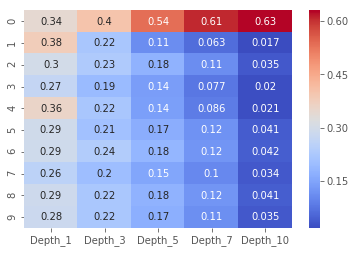

In [206]:
colormap = plt.cm.coolwarm
sns.heatmap(df_cv, annot=True, cmap=colormap)